In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import zipfile, os, cv2
from tqdm.auto import tqdm
import tensorflow as tf

import keras
from tensorflow.python.keras.models import Model
from tensorflow.python.keras import layers, callbacks, utils

import imgaug as ia
from imgaug import augmenters as iaa

sns.set_style('darkgrid')

2022-05-27 17:34:25.825122: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/matheus/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-05-27 17:34:25.825137: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
path_zip = '/home/matheus/Documentos/autoencoder/matheus'
path = '/home/matheus/Documentos/autoencoder/matheus'

# with zipfile.ZipFile(path_zip + 'train', 'r') as zip_ref:
#     zip_ref.extractall(path)

# with zipfile.ZipFile(path_zip + 'test', 'r') as zip_ref:
#     zip_ref.extractall(path)  
    
# with zipfile.ZipFile(path_zip + 'train_cleaned', 'r') as zip_ref:
#     zip_ref.extractall(path)  
    
# with zipfile.ZipFile(path_zip + 'sampleSubmission.csv.zip', 'r') as zip_ref:
#     zip_ref.extractall(path)
    
train_img = sorted(os.listdir(path+'/train'))
train_cleaned_img = sorted(os.listdir(path + '/train_cleaned'))
test_img = sorted(os.listdir(path + '/test'))

# train_img = sorted(os.listdir(path + '/train'))
# train_cleaned_img = sorted(os.listdir(path + '/train_cleaned'))
# test_img = sorted(os.listdir(path + '/test'))

In [3]:
class config():
    IMG_SIZE = (420, 540)

imgs = [cv2.imread(path + '/train/' + f) for f in sorted(os.listdir(path + '/train/'))]
print('Median Dimensions:', np.median([len(img) for img in imgs]), np.median([len(img[0]) for img in imgs]))
del imgs

# imgs = [cv2.imread(path + 'train/' + f) for f in sorted(os.listdir(path + 'train/'))]
# print('Median Dimensions:', np.median([len(img) for img in imgs]), np.median([len(img[0]) for img in imgs]))
# del imgs

Median Dimensions: 420.0 540.0


In [4]:
def process_image(path):
    img = cv2.imread(path)
    img = np.asarray(img, dtype="float32")
    img = cv2.resize(img, config.IMG_SIZE[::-1])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img/255.0
    img = np.reshape(img, (*config.IMG_SIZE, 1))
    
    return img

In [5]:
train = []
train_cleaned = []
test = []

for f in sorted(os.listdir(path + '/train/')):
    train.append(process_image(path + '/train/' + f))

for f in sorted(os.listdir(path + '/train_cleaned/')):
    train_cleaned.append(process_image(path + '/train_cleaned/' + f))
    
for f in sorted(os.listdir(path + '/test/')):
    test.append(process_image(path + '/test/' + f))
    
train = np.asarray(train)
train_cleaned = np.asarray(train_cleaned)
test = np.asarray(test)

In [6]:
train.shape, train_cleaned.shape, test.shape
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

2022-05-27 17:34:28.728975: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/matheus/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-05-27 17:34:28.728992: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-27 17:34:28.729006: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (matheus-V50s-07IMB): /proc/driver/nvidia/version does not exist
2022-05-27 17:34:28.729184: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


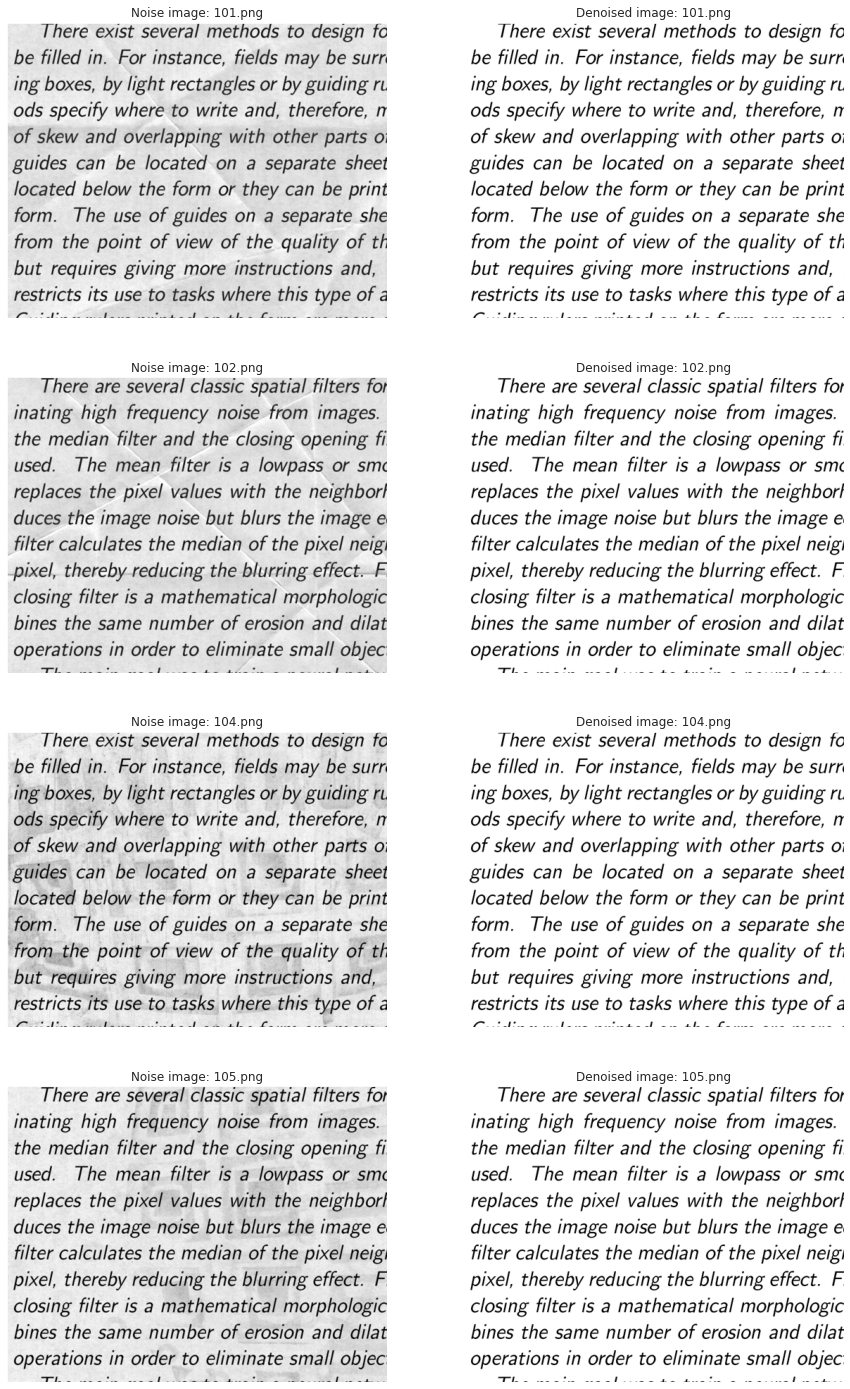

In [7]:
fig, ax = plt.subplots(4, 2, figsize=(15,25))
for i in range(4):
    ax[i][0].imshow(tf.squeeze(train[i]), cmap='gray')
    ax[i][0].set_title('Noise image: {}'.format(train_img[i]))
    
    ax[i][1].imshow(tf.squeeze(train_cleaned[i]), cmap='gray')
    ax[i][1].set_title('Denoised image: {}'.format(train_img[i]))
    
    ax[i][0].get_xaxis().set_visible(False)
    ax[i][0].get_yaxis().set_visible(False)
    ax[i][1].get_xaxis().set_visible(False)
    ax[i][1].get_yaxis().set_visible(False)